# RIT IMGS 211: Probability and Statistics for Imaging Scientists
### Created by Gabriel J. Diaz

![](https://www.rit.edu/brandportal/sites/rit.edu.brandportal/files/inline-images/new_RIT_full_RGB_hor_k_0.png?export=view&id=XXX)


* Import two images.

* Display them.

* Line plot of...
  * Digital counts on X
  * Frequency on Y
  

* Extract mean red, green, and blue values for each image.
  * Plot using box plot
* Convert image data into the HSV color space
* Plot hue values for apples vs oranges



In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Import and display an image

The image must be placed in the folder "IMGS211" on mydrive

In [31]:
from google.colab import drive
from zmq.sugar.frame import Frame
drive.mount("/content/drive",force_remount=True)
import os

os.chdir('/content/drive/MyDrive/IMGS211')

import cv2
from google.colab.patches import cv2_imshow

Mounted at /content/drive


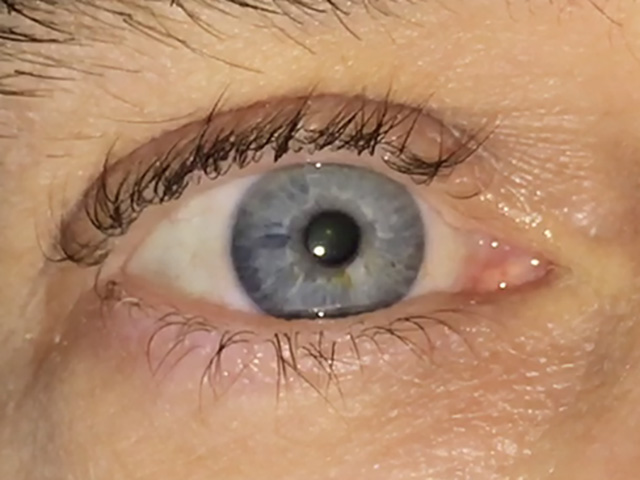

In [32]:
eye_image = cv2.imread('eye1.jpg');
cv2_imshow(eye_image)

# Below, I extract two patches from the image.  

In the subsequent notebook, I will explore the color information in these two patches.

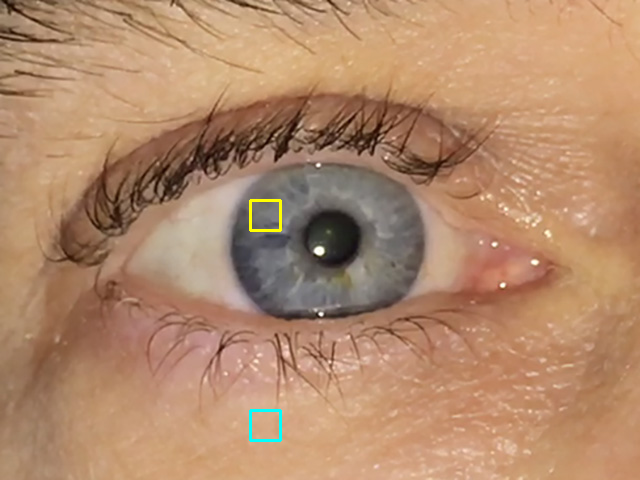

In [80]:
eye_image = cv2.imread('eye1.jpg');

thickness = 2
win_size = [30, 30]

skinbox_color = (255, 255, 0) # In openCV, BGR.  This is BLUE + GREEN (cyan)
skinbox_start_point = np.array([250, 410])
skinbox_end_point = skinbox_start_point + win_size

irisbox_color = (0, 255, 255) # In openCV, BGR.  This is GREEN + RED (yellow)
irisbox_start_point = np.array([250, 200])
irisbox_end_point = irisbox_start_point + win_size

# Add a cyan box to indicate the pupil
eye_image = cv2.rectangle(eye_image, skinbox_start_point, skinbox_end_point, skinbox_color, thickness)

# Add a yellow box to indicate the iris
eye_image = cv2.rectangle(eye_image, irisbox_start_point, irisbox_end_point, irisbox_color, thickness)

cv2_imshow(eye_image)


# Define skin_image, iris_image.

I will use indexing to isolate the sections of the image indicated above.
I will also seperate out color channels (e.g., p_blue, i_blue)


In [83]:
eye_image = cv2.imread('eye1.jpg');

skin_image = eye_image[410:440, 250:280, :]
iris_image = eye_image[200:230, 250:280, :]

cv2_imshow(skin_image)
cv2_imshow(iris_image)

Plot seperate color channels for both.  

In [85]:
s_blue = skin_image[:,:,0]
s_green = skin_image[:,:,1]
s_red = skin_image[:,:,2]

i_blue = iris_image[:,:,0]
i_green = iris_image[:,:,1]
i_red = iris_image[:,:,2]

cv2_imshow(np.hstack([s_blue, s_green, s_red]))
cv2_imshow(np.hstack([i_blue, i_green, i_red]))

# A scatter plot of image patches

([<matplotlib.axis.XTick at 0x7a2ebf2e8e20>,
 [Text(1, 0, 'blue'), Text(2, 0, 'green'), Text(3, 0, 'red')])

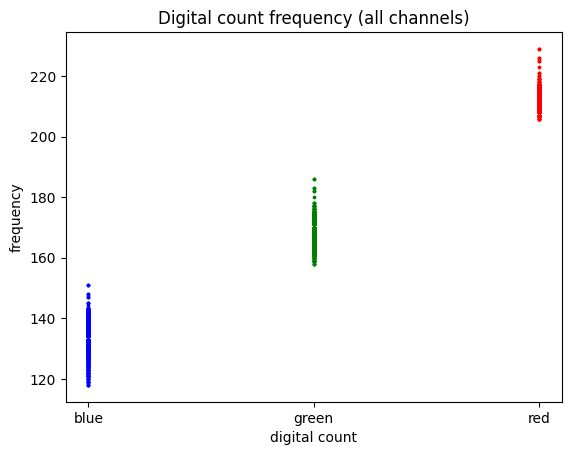

In [103]:

# We need an x value for every y value.
# We have len(s_blue.flatten() y values.
# Below, I use a trick to repeat the list [1] that many times!
x_data = [1] * len(s_blue.flatten()) # Multipy a list by an integer to repeat the list

plt.scatter( x_data, s_blue.flatten(), s = 3, c='b')
plt.scatter( [2] * len(s_green.flatten()), s_green.flatten(), s = 3, c='g')
plt.scatter( [3] * len(s_red.flatten()), s_red.flatten(), s = 3, c='r')

# Adding the title
plt.title("Digital count frequency (all channels)")

# Adding the labels
plt.ylabel("frequency")
plt.xlabel("digital count")

# Change tick labels
plt.xticks([1,2,3],['blue','green','red'])

# Box plot

([<matplotlib.axis.XTick at 0x7a2ebe8700d0>,
 [Text(1, 0, 'blue'), Text(2, 0, 'green'), Text(3, 0, 'red')])

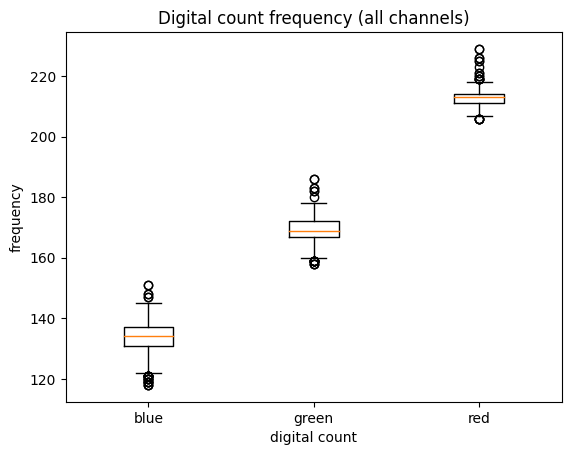

In [149]:
# basic Box plot
plt.boxplot([s_blue.flatten(),s_green.flatten(),s_red.flatten() ]);

# Adding the title
plt.title("Digital count frequency (all channels)")

# Adding the labels
plt.ylabel("frequency")
plt.xlabel("digital count")

# Change tick labels
plt.xticks([1,2,3],['blue','green','red'])

## Plot the number of occurrances of each value in each channel


Text(0.5, 0, 'digital count')

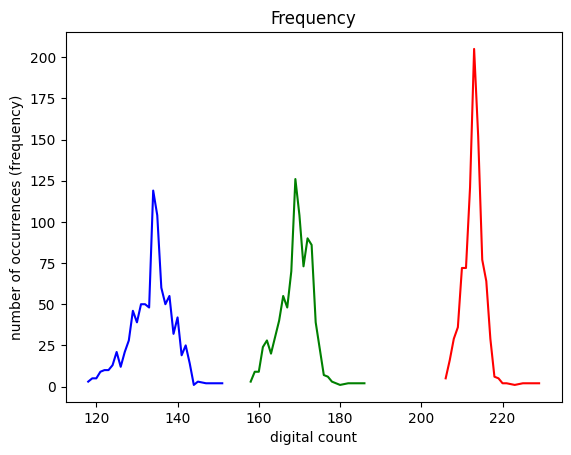

In [119]:
b_values, b_counts = np.unique(s_blue.flatten(), return_counts=True,)
g_values, g_counts = np.unique(s_green.flatten(), return_counts=True,)
r_values, r_counts = np.unique(s_red.flatten(), return_counts=True,)

plt.plot(b_values, b_counts,'b')
plt.plot(g_values, g_counts,'g')
plt.plot(r_values, r_counts,'r')

# Adding the title
plt.title("Frequency")

# Adding the labels
plt.ylabel("number of occurrences (frequency)")
plt.xlabel("digital count")

# What if we need to compare the color of two images?


This is difficult with RBG, because the color channels influence on appearance is not independent.  This would be more informative if we view the color in the HSV color space.  This way, we can look at just the HUE value

![](https://www.rit.edu/brandportal/sites/rit.edu.brandportal/files/inline-images/hsv_cylinder.png?export=view&id=XXX)


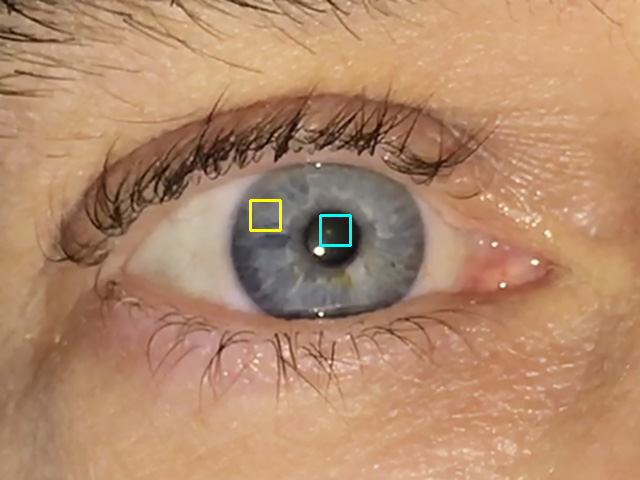

In [137]:
eye_image = cv2.imread('eye1.jpg');

thickness = 2
win_size = [30, 30]

pupilbox_color = (255, 255, 0) # In openCV, BGR.  This is BLUE + GREEN (cyan)
pupilbox_start_point = np.array([320, 215])
pupilbox_end_point = pupilbox_start_point + win_size

irisbox_color = (0, 255, 255) # In openCV, BGR.  This is GREEN + RED (yellow)
irisbox_start_point = np.array([250, 200])
irisbox_end_point = irisbox_start_point + win_size

# Add a cyan box to indicate the pupil
eye_image = cv2.rectangle(eye_image, pupilbox_start_point, pupilbox_end_point, pupilbox_color, thickness)

# Add a yellow box to indicate the iris
eye_image = cv2.rectangle(eye_image, irisbox_start_point, irisbox_end_point, irisbox_color, thickness)

cv2_imshow(eye_image)


In [147]:
eye_image = cv2.imread('eye1.jpg');

pupil_image = eye_image[215:245, 320:350, :]
iris_image = eye_image[200:230, 250:280, :]



cv2_imshow(pupil_image)
pupil_hsv = cv2.cvtColor(pupil_image, cv2.COLOR_BGR2HSV)
print(f'The dimensions of pupil_hsv are:  {np.shape(pupil_hsv)}' )

cv2_imshow(iris_image)
iris_hsv = cv2.cvtColor(iris_image, cv2.COLOR_BGR2HSV)
print(f'The dimensions of iris_hsv are:  {np.shape(iris_hsv)}' )

The dimensions of pupil_hsv are:  (30, 30, 3)


The dimensions of iris_hsv are:  (30, 30, 3)


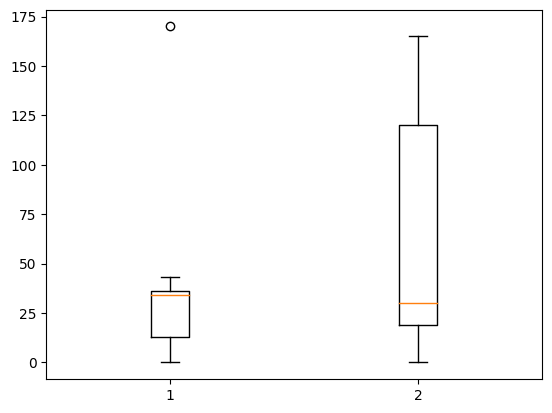

In [148]:
# basic plot
plt.boxplot([pupil_hsv[:,:,0].flatten(), iris_hsv[:,:,0].flatten()]);